In [403]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import pickle

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import sklearn.svm as svm
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
from matplotlib_venn import venn2, venn2_circles

from xgboost import plot_importance
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [404]:
def seed_everything(seed):
    random.seed(seed) #파이썬 자체 모듈 random 모듈의 시드 고정
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed)

seed_everything(37) # Seed 고정

# Data Load

In [405]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [406]:
sub = pd.read_csv('./sample_submission.csv')

# Data Preprocessing

X

In [407]:
train_a = train_df[train_df['PRODUCT_CODE']=='A_31']
train_to = train_df[(train_df['PRODUCT_CODE']=='T_31') | (train_df['PRODUCT_CODE']=='O_31')]

In [408]:
test_a = test_df[test_df['PRODUCT_CODE']=='A_31']
test_to = test_df[(test_df['PRODUCT_CODE']=='T_31') | (test_df['PRODUCT_CODE']=='O_31')]

In [435]:
#a 상위 200 column X_938까지할지 생각중
a_top134_list = ['X_318', 'X_248', 'X_256', 'X_2728', 'X_1048', 'X_1033', 'X_1109', 'X_1743', 'X_1055', 'X_1010', 'X_189', 'X_1774', 'X_1176', 'X_1158', 'X_1120', 'X_2190', 'X_1373', 'X_1026', 'X_2427', 'X_2423', 'X_1569', 'X_1991', 'X_1562', 'X_1037', 'X_1679', 'X_1563', 'X_1953', 'X_1720', 'X_996', 'X_2541', 'X_1329', 'X_1082', 'X_2797', 'X_1548', 'X_1665', 'X_1124', 'X_959', 'X_1422', 'X_1058', 'X_1806', 'X_1716', 'X_1408', 'X_1286', 'X_1812', 'X_1243', 'X_1231', 'X_1214', 'X_1054', 'X_993', 'X_1089', 'X_130', 'X_1211', 'X_1099', 'X_1076', 'X_2097', 'X_1945', 'X_1854', 'X_1786', 'X_1521', 'X_1356', 'X_1337', 'X_1123', 'X_1110', 'X_1053', 'X_2084', 'X_1291', 'X_141', 'X_1864', 'X_1275', 'X_1179', 'X_1948', 'X_1420', 'X_1264', 'X_1560', 'X_1543', 'X_1343', 'X_1114', 'X_1108', 'X_1083', 'X_947', 'X_2017', 'X_1856', 'X_1279', 'X_1207', 'X_967', 'X_257', 'X_251', 'X_2791', 'X_1382', 'X_1371', 'X_1190', 'X_1154', 'X_1030', 'X_973', 'X_953', 'X_2021', 'X_1954', 'X_1860', 'X_1625', 'X_1212', 'X_1194', 'X_1014', 'X_961', 'X_943', 'X_1949', 'X_1816', 'X_1668', 'X_1220', 'X_999', 'X_982', 'X_258', 'X_1794', 'X_1651', 'X_1616', 'X_1389', 'X_1344', 'X_1239', 'X_1107', 'X_1013', 'X_948', 'X_307', 'X_2700', 'X_1750', 'X_1530', 'X_1424', 'X_1423', 'X_1374', 'X_1366', 'X_1347', 'X_1160', 'X_1129', 'X_984', 'X_945', 'X_938']
len(a_top134_list)

134

In [ ]:
#938이후
, 'X_1406', 'X_1339', 'X_1294', 'X_1188', 'X_1029','X_979', 'X_348', 'X_290', 'X_2704', 'X_1631', 'X_1568', 'X_1534', 'X_1532', 'X_1518', 'X_1411', 'X_1369', 'X_1355', 'X_1285', 'X_1262', 'X_1205', 'X_1098', 'X_1052', 'X_972', 'X_942', 'X_345', 'X_217', 'X_2446', 'X_1919', 'X_1866', 'X_1526', 'X_1359', 'X_1357', 'X_1288', 'X_1283', 'X_1265', 'X_1202', 'X_1184', 'X_1155', 'X_1121', 'X_1101', 'X_1094', 'X_1077', 'X_1063', 'X_956', 'X_955', 'X_364', 'X_339', 'X_2418', 'X_2018', 'X_1973', 'X_1952', 'X_1635', 'X_1587', 'X_1584', 'X_1428', 'X_1425', 'X_1379', 'X_1338', 'X_1221', 'X_1197', 'X_1125', 'X_1122', 'X_128', 'X_2710', 'X_2068', 'X_2051']

In [436]:
#to 상위 200 column 0.5까지만(0.5 조건 x)
to_top137_list = ['X_932', 'X_458', 'X_73', 'X_516', 'X_718', 'X_838', 'X_401', 'X_124', 'X_783', 'X_698', 'X_493', 'X_497', 'X_422', 'X_536', 'X_556', 'X_790', 'X_419', 'X_712', 'X_490', 'X_399', 'X_442', 'X_397', 'X_613', 'X_835', 'X_700', 'X_678', 'X_709', 'X_611', 'X_546', 'X_769', 'X_659', 'X_606', 'X_436', 'X_554', 'X_484', 'X_483', 'X_126', 'X_12', 'X_498', 'X_102', 'X_780', 'X_786', 'X_687', 'X_614', 'X_485', 'X_421', 'X_489', 'X_400', 'X_774', 'X_491', 'X_663', 'X_446', 'X_398', 'X_394', 'X_841', 'X_500', 'X_462', 'X_661', 'X_90', 'X_590', 'X_385', 'X_792', 'X_714', 'X_665', 'X_608', 'X_572', 'X_456', 'X_896', 'X_816', 'X_517', 'X_897', 'X_772', 'X_530', 'X_515', 'X_482', 'X_514', 'X_496', 'X_2', 'X_895', 'X_757', 'X_560', 'X_543', 'X_501', 'X_907', 'X_894', 'X_605', 'X_581', 'X_566', 'X_473', 'X_448', 'X_105', 'X_855', 'X_716', 'X_107', 'X_850', 'X_662', 'X_595', 'X_574', 'X_573', 'X_555', 'X_460', 'X_439', 'X_438', 'X_616', 'X_599', 'X_563', 'X_452', 'X_407', 'X_589', 'X_523', 'X_461', 'X_690', 'X_539', 'X_831', 'X_789', 'X_588', 'X_454', 'X_404', 'X_388', 'X_120', 'X_848', 'X_711', 'X_671', 'X_619', 'X_596', 'X_513', 'X_451', 'X_389', 'X_127', 'X_118', 'X_815', 'X_812', 'X_766', 'X_471', 'X_464', 'X_437', 'X_101']
len(to_top137_list)

137

In [384]:
print(len(train_a))
print(len(train_to))
print(len(test_a))
print(len(test_to))

249
349
67
243


In [409]:
rem_col_a = train_a.isnull().sum()[train_a.isnull().sum() == 249].index.tolist()
rem_col_to = train_to.isnull().sum()[train_to.isnull().sum() == 349].index.tolist()

In [438]:
s1 = set(rem_col_a) #모두 null column
s2 = set(a_top134_list) #best 영향력 순위에 있는 column

In [439]:
s3 = set(rem_col_to) #모두 null column
s4 = set(to_top137_list) #best 영향력 순위에 있는 column

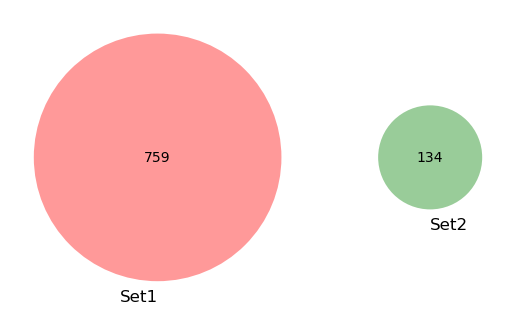

In [440]:
def draw_venn(sets):
    venn2(subsets=sets, set_labels=('Set1', 'Set2'))
    plt.show()
    
draw_venn([s1, s2])  #train_a는 순위에 있는 아이들로만 진행한다.null column만 지우면, feature가 너무 많기 때문 

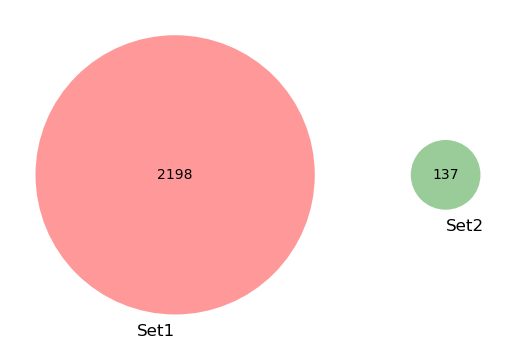

In [441]:
draw_venn([s3, s4]) #train_to는,,,, 안쓰는 null column이 너무 많다. null column만 지우고 진행

In [ ]:
#101이후
, 'X_845', 'X_763', 'X_688', 'X_677', 'X_447', 'X_413', 'X_402', 'X_883', 'X_851', 'X_791', 'X_669', 'X_562', 'X_494', 'X_468', 'X_457', 'X_412', 'X_109', 'X_16', 'X_796', 'X_794', 'X_681', 'X_668', 'X_477', 'X_98', 'X_46', 'X_18', 'X_580', 'X_570', 'X_553', 'X_499', 'X_453', 'X_440', 'X_387', 'X_45', 'X_813', 'X_775', 'X_615', 'X_607', 'X_576', 'X_537', 'X_524', 'X_476', 'X_475', 'X_403', 'X_17', 'X_909', 'X_846', 'X_817', 'X_795', 'X_710', 'X_703', 'X_686', 'X_667', 'X_651', 'X_610', 'X_520', 'X_405', 'X_11', 'X_5', 'X_853', 'X_833', 'X_827', 'X_755', 'X_754', 'X_717', 'X_684', 'X_660', 'X_618', 'X_600', 'X_557', 'X_529', 'X_502', 'X_428', 'X_415', 'X_119', 'X_110', 'X_106', 'X_7']

In [8]:
print(len(train_a)) #196 245
print(len(train_to))

249
349


In [80]:
train_a.groupby(['LINE', 'Y_Class'])[[i for i in a_top200_list]].count()

X_318  X_248  X_256  X_2728  X_1048  X_1033  X_1109  X_1743  \
LINE    Y_Class                                                                
T010305 0           13     13     13       0      13      13      13       0   
        1           35     35     35       0      35      35      35       0   
        2           11     11     11       0      11      11      11       0   
T010306 0            6      6      6       0       6       6       6       0   
        1           37     37     37       0      37      37      37       0   
        2           27     27     27       0      27      27      27       0   
T050304 0            0      0      0      30      30      30      30      30   
        1            0      0      0      37      37      37      37      37   
        2            0      0      0      11      11      11      11      11   
T050307 0            0      0      0      11      11      11      11      11   
        1            0      0      0       9       9       9       9       9   
        2            0      0      0      22      22      22      22      22   

                 X_1055  X_1010  X_189  X_1774  X_1176  X_1158  X_1120  \
LINE    Y_Class                                                          
T010305 0            13       0      0       0      13      13      13   
        1            35       0      0       0      35      35      35   
        2            11       0      0       0      11      11      11   
T010306 0             6       0      0       0       6       6       6   
        1            37       0      0       0      37      37      37   
        2            27       0      0       0      27      27      27   
T050304 0            30      30     30      30      30      30      30   
        1            37      37     37      37      37      37      37   
        2            11      11     11      11      11      11      11   
T050307 0            11      11     11      11      11      11      11   
        1             9       9      9       9       9       9       9   
        2            22      22     22      22      22      22      22   

                 X_2190  X_1373  X_1026  X_2427  X_2423  X_1569  X_1991  \
LINE    Y_Class                                                           
T010305 0             0      13      13       0       0      13       0   
        1             0      35      35       0       0      35       0   
        2             0      11      11       0       0      11       0   
T010306 0             0       6       6       0       0       6       0   
        1             0      37      37       0       0      37       0   
        2             0      27      27       0       0      27       0   
T050304 0            30      30      30      30      30      30      30   
        1            37      37      37      37      37      37      37   
        2            11      11      11      11      11      11      11   
T050307 0            11      11      11      11      11      11       0   
        1             9       9       9       9       9       9       9   
        2            22      22      22      22      22      22      22   

                 X_1562  X_1037  X_1679  X_1563  X_1953  X_1720  X_996  \
LINE    Y_Class                                                          
T010305 0            13      13      13      13       0       0     13   
        1            35      35      35      35       0       0     35   
        2            11      11      11      11       0       0     11   
T010306 0             6       6       6       6       0       0      6   
        1            37      37      37      37       0       0     37   
        2            27      27      27      27       0       0     27   
T050304 0            30      30      30      30      30      30     30   
        1            37      37      37      37      37      37     37   
        2            11      11      11      11      11      11     

In [84]:
train_to.groupby(['LINE', 'Y_Class'])[[i for i in to_top182_list]].count()

X_932  X_458  X_73  X_516  X_718  X_838  X_401  X_124  X_783  \
LINE    Y_Class                                                                 
T100304 0           17     17    17     17     17     17     17     17     17   
        1          144    144   144    144    144    144    144    144    144   
        2           14     14    14     14     14     14     14     14     14   
T100306 0           11     11    11     11     11     11     11      0     11   
        1          145    145   145    145    145    145    145      0    145   
        2           18     18    18     18     18     18     18      0     18   

                 X_698  X_493  X_497  X_422  X_536  X_556  X_790  X_419  \
LINE    Y_Class                                                           
T100304 0           17     17     17     17     17     17     17     17   
        1          144    144    144    144    144    144    144    144   
        2           14     14     14     14     14     14     14     14   
T100306 0           11     11     11     11     11     11     11     11   
        1          145    145    145    145    145    145    145    145   
        2           18     18     18     18     18     18     18     18   

                 X_712  X_490  X_399  X_442  X_397  X_613  X_835  X_700  \
LINE    Y_Class                                                           
T100304 0           17     17     17     17     17     17     17     17   
        1          144    144    144    144    144    144    144    144   
        2           14     14     14     14     14     14     14     14   
T100306 0           11     11     11     11     11     11     11     11   
        1          145    145    145    145    145    145    145    145   
        2           18     18     18     18     18     18     18     18   

                 X_678  X_709  X_611  X_546  X_769  X_659  X_606  X_436  \
LINE    Y_Class                                                           
T100304 0           17     17     17     17     17     17     17     17   
        1          144    144    144    144    144    144    144    144   
        2           14     14     14     14     14     14     14     14   
T100306 0           11     11     11     11     11     11     11     11   
        1          145    145    145    145    145    145    145    145   
        2           18     18     18     18     18     18     18     18   

                 X_554  X_484  X_483  X_126  X_12  X_498  X_102  X_780  X_786  \
LINE    Y_Class                                                                 
T100304 0           17     17     17      0    17     17     17     17     17   
        1          144    144    144      0   144    144    144    144    144   
        2           14     14     14      0    14     14     14     14     14   
T100306 0           11     11     11     11    11     11     11     11     11   
        1          145    145    145    145   145    145    145    145    145   
        2           18     18     18     18    18     18     18     18     18   

                 X_687  X_614  X_485  X_421  X_489  X_400  X_774  X_491  \
LINE    Y_Class                                                           
T100304 0           17     17     17     17     17     17     17     17   
        1          144    144    144    144    144    144    144    144   
        2           14     14     14     14     14     14     14     14   
T100306 0           11     11     11     11     11     11     11     11   
        1          145    145    145    145    145    145    145    145   
        2           18     18     18     18     18     18     18     18   

                 X_663  X_446  X_398  X_394  X_841  X_500  X_462  X_661  X_90  \
LINE    Y_Class                                                                 
T100304 0           17     17     17     17     17     17     17     17    17   
        1          144    144    144    144    144    144    144    144 

In [85]:
train_df.groupby(['LINE', 'Y_Class'])[[i for i in train_df[-2875:]]].count()

PRODUCT_ID  Y_Class  Y_Quality  TIMESTAMP  LINE  \
LINE    Y_Class                                                    
T010305 0                13       13         13         13    13   
        1                35       35         35         35    35   
        2                11       11         11         11    11   
T010306 0                 6        6          6          6     6   
        1                37       37         37         37    37   
        2                27       27         27         27    27   
T050304 0                30       30         30         30    30   
        1                37       37         37         37    37   
        2                11       11         11         11    11   
T050307 0                11       11         11         11    11   
        1                 9        9          9          9     9   
        2                22       22         22         22    22   
T100304 0                17       17         17         17    17   
        1               144      144        144        144   144   
        2                14       14         14         14    14   
T100306 0                11       11         11         11    11   
        1               145      145        145        145   145   
        2                18       18         18         18    18   

                 PRODUCT_CODE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  \
LINE    Y_Class                                                              
T010305 0                  13    0    0    0    0    0    0    0    0    0   
        1                  35    0    0    0    0    0    0    0    0    0   
        2                  11    0    0    0    0    0    0    0    0    0   
T010306 0                   6    0    0    0    0    0    0    0    0    0   
        1                  37    0    0    0    0    0    0    0    0    0   
        2                  27    0    0    0    0    0    0    0    0    0   
T050304 0                  30    0    0    0    0    0    0    0    0    0   
        1                  37    0    0    0    0    0    0    0    0    0   
        2                  11    0    0    0    0    0    0    0    0    0   
T050307 0                  11    0    0    0    0    0    0    0    0    0   
        1                   9    0    0    0    0    0    0    0    0    0   
        2                  22    0    0    0    0    0    0    0    0    0   
T100304 0                  17   17   17   17   17   17   17   17   17   17   
        1                 144  144  144  144  144  144  144  144  144  144   
        2                  14   14   14   14   14   14   14   14   14   14   
T100306 0                  11   11   11   11   11   11   11   11   11   11   
        1                 145  145  145  145  145  145  145  145  145  145   
        2                  18   18   18   18   18   18   18   18   18   18   

                 X_10  X_11  X_12  X_13  X_14  X_15  X_16  X_17  X_18  X_19  \
LINE    Y_Class                                                               
T010305 0           0     0     0     0     0     0     0     0     0     0   
        1           0     0     0     0     0     0     0     0     0     0   
        2           0     0     0     0     0     0     0     0     0     0   
T010306 0           0     0     0     0     0     0     0     0     0     0   
        1           0     0     0     0     0     0     0     0     0     0   
        2           0     0     0     0     0     0     0     0     0     0   
T050304 0           0     0     0     0     0     0     0     0     0     0   
        1           0     0     0     0     0     0     0     0     0     0   
        2           0     0     0     0     0     0     0     0     0     0   
T050307 0           0     0     0     0     0     0     0     0     0     0   
        1           0     0     0     0     0     0     0     0     0     0   
        2           0     0     0     0     0     0     0     0     

In [141]:
train_to.groupby('LINE')['X_92'].mean() #304라인만 측정된다면 306 결측치 174개

LINE
T100304    28.0
T100306     NaN
Name: X_92, dtype: float64

In [142]:
train_to.groupby('LINE')['X_93'].mean()#306라인만 측정된다면 304 결측치 175개

LINE
T100304     NaN
T100306    0.19
Name: X_93, dtype: float64

In [158]:
train_to.groupby('LINE')['X_529'].mean()

LINE
T100304    258.380601
T100306    257.152434
Name: X_529, dtype: float64

<train_to 분석>
X_384~399, 406~441  472~528 등등등 결측치 1개 이런걸 채워주려한다.

X529~533 처럼 두 라인에서 원래 다 측정되야 하지만, 측정되지 않은 것들을 yclass와 라인별로 median값을 넣어줄 것. 339나 262개의 결측치

In [420]:
def fill_nan(df): #미디언으로 해주는 이유는 yclass가 0인건 55 1인건 59 이런 식으로 규칙이 존재하기 때문에 함부로 평균을 내면 안될 것 같음
    for col in df.columns[-2875:]: #X_1 ~ X_1531 , -1345
        #모두 결측치 인 경우 채우지 않는다.
        #T304 라인만 측정된 경우, 냅두기
        #T306 라인만 측정된 경우, 냅두기

        if df[col].isnull().sum() == len(df): #모든 value가 결측치인 행
            continue
            
        elif len(df) - df[col].isnull().sum() <= 10: #너무 적은 개수만큼 측정되었다면, 그냥 채우지 않기 train_df_o의 경우 x
            continue
            
        elif df[col].isnull().sum() == 0: #모든 값이 다 측정된 경우 null 0개
            continue
            
        elif df[col].isnull().sum() < len(df): #T050이나 T010라인만 측정된 경우 어차피 값이 들어가지 않을 것임.
            nan_lst = list(df[df[col].isnull()==True].index)
            for j in nan_lst:
                yc = df['Y_Class'][j]
                line = df['LINE'][j]
                val = df[col][(df['Y_Class']==yc) & (df['LINE']==line)].median()
                df[col][j] = val

    fill_df = df    
    return fill_df

train 데이터에만 결측치의 일부 채워준다.

In [421]:
train_fill_a = fill_nan(train_a)
train_fill_to = fill_nan(train_to)

In [223]:
train_a.groupby('LINE')['X_339', 'X_340', 'X_341'].mean()

,X_339,X_340,X_341
LINE,,,
T010305,0.000007,NaN,NaN
T010306,NaN,0.22,0.229714
T050304,NaN,NaN,NaN
T050307,NaN,NaN,NaN


In [442]:
drop_col_a = set(train_a.columns[-2875:])-set(a_top134_list)
# drop_col_to = set(train_to.columns[-2875:])-set(to_top137_list)

In [443]:
train_drop_a = train_fill_a.drop(drop_col_a, axis = 1)
train_drop_to = train_fill_to.drop(rem_col_to, axis = 1)

In [444]:
test_drop_a = test_a.drop(drop_col_a, axis = 1)
test_drop_to = test_to.drop(rem_col_to, axis = 1)

In [19]:
# train_df_pro = pd.concat([train_drop_a, train_drop_to], axis = 0)
# test_df_pro = pd.concat([test_drop_a, test_drop_to], axis = 0)

In [445]:
train_y = train_drop_to['Y_Class']

In [446]:
train_x = train_drop_to.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
test_x = test_drop_to.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [390]:
#train_x = train_df_pro.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE'])
#test_x = test_df_pro.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'LINE', 'PRODUCT_CODE'])

In [447]:
p1 = test_x.index.tolist() #28 #39 # 
p1

[0,
 1,
 2,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 55,
 56,
 57,
 58,
 59,
 60,
 67,
 68,
 69,
 70,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,

범주형 데이터를 수치 데이터로 전환하기 위해 LabelEncoder 활용

In [448]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i]) #원래 column 값을 기준으로 fit.
    train_x[i] = le.transform(train_x[i]) #수치화, 수치로 변형

    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


# Modeling

# A data

학습용과 테스트용 데이터 세트를 위해 별도의 Dmatrix를 생성s

{'colsample_bytree': 1, 'learning_rate': 0.04, 'max_depth': 6, 'min_child_weight': 3, 'min_split_loss': 1.5, 'reg_alpha': 1.5}

In [100]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' :6,
          'eta': 0.03,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'min_child_weight' : 3,
          'subsample' :1,
          'gamma' : 2, #default 0 gamma 0.2, 0.8로 하고 earlystopping 하면 score가 늘어난다.
          'alpha' : 2
          }
num_rounds = 1000

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.07160	eval-mlogloss:1.08083
[1]	train-mlogloss:1.04728	eval-mlogloss:1.06572
[2]	train-mlogloss:1.02320	eval-mlogloss:1.04940
[3]	train-mlogloss:0.99997	eval-mlogloss:1.03464
[4]	train-mlogloss:0.97708	eval-mlogloss:1.01995
[5]	train-mlogloss:0.95573	eval-mlogloss:1.00659
[6]	train-mlogloss:0.93569	eval-mlogloss:0.99396
[7]	train-mlogloss:0.91612	eval-mlogloss:0.98141
[8]	train-mlogloss:0.89672	eval-mlogloss:0.96956
[9]	train-mlogloss:0.87952	eval-mlogloss:0.95943
[10]	train-mlogloss:0.86327	eval-mlogloss:0.94983
[11]	train-mlogloss:0.84562	eval-mlogloss:0.93954
[12]	train-mlogloss:0.83085	eval-mlogloss:0.93072
[13]	train-mlogloss:0.81661	eval-mlogloss:0.92228
[14]	train-mlogloss:0.80219	eval-mlogloss:0.91325
[15]	train-mlogloss:0.78834	eval-mlogloss:0.90492
[16]	train-mlogloss:0.77551	eval-mlogloss:0.89753
[17]	train-mlogloss:0.76188	eval-mlogloss:0.88982
[18]	train-mlogloss:0.74931	eval-mlogloss:0.88221
[19]	train-mlogloss:0.73803	eval-mlogloss:0.87610
[20]	train

[163]	train-mlogloss:0.35604	eval-mlogloss:0.63943
[164]	train-mlogloss:0.35604	eval-mlogloss:0.63943
[165]	train-mlogloss:0.35603	eval-mlogloss:0.63943
[166]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[167]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[168]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[169]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[170]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[171]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[172]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[173]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[174]	train-mlogloss:0.35602	eval-mlogloss:0.63946
[175]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[176]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[177]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[178]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[179]	train-mlogloss:0.35601	eval-mlogloss:0.63947
[180]	train-mlogloss:0.35601	eval-mlogloss:0.63947
[181]	train-mlogloss:0.35600	eval-mlogloss:0.63947
[182]	train-mlogloss:0.35600	ev

In [101]:
print(f'best ntree limit은 {xgb_model.best_ntree_limit}')
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

best ntree limit은 118
0.75990675990676


In [102]:
y_preds = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_preds).astype(int)
preds

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [30]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [31]:
subm = pd.read_csv('t30_XGB_Dmatrix_Earlystopping_eta0035_testsize01(0.704).csv')
subm

,PRODUCT_ID,Y_Class
0,TEST_000,1
1,TEST_001,1
2,TEST_002,1
3,TEST_003,1
4,TEST_004,1
5,TEST_005,1
6,TEST_006,1
7,TEST_007,1
8,TEST_008,0
9,TEST_009,1


In [103]:
y_preds = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds_1 = np.round(y_preds).astype(int)
preds1 = pd.DataFrame(preds_1)
p1 = pd.Series(data = p1)
preds10 = pd.concat([preds1, p1], axis = 1)
preds10.columns = ['y_class', 'p1']
preds10.index = preds10['p1']
del preds10['p1']
preds10

,y_class
p1,
3,1
4,1
5,2
6,1
7,0
8,1
9,2
10,1
11,1


# TO data

### Gridsearch

In [164]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(n_estimators=200)

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

# 후보 파라미터 선정
params = {'max_depth':[6], 'min_child_weight':[3], 'colsample_bytree':[1],'learning_rate' :[0.03, 0.04], 'reg_alpha' : [0.5,1, 1.5], 'min_split_loss':[0.5, 1, 1.5]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(train_x, train_y, early_stopping_rounds=20, eval_metric='mlogloss', eval_set=[(X_val, y_val)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

[0]	validation_0-mlogloss:1.06120
[1]	validation_0-mlogloss:1.02580
[2]	validation_0-mlogloss:0.99227
[3]	validation_0-mlogloss:0.96046
[4]	validation_0-mlogloss:0.93025
[5]	validation_0-mlogloss:0.90152
[6]	validation_0-mlogloss:0.87418
[7]	validation_0-mlogloss:0.84813
[8]	validation_0-mlogloss:0.82330
[9]	validation_0-mlogloss:0.79961
[10]	validation_0-mlogloss:0.77699
[11]	validation_0-mlogloss:0.75539
[12]	validation_0-mlogloss:0.73473
[13]	validation_0-mlogloss:0.71497
[14]	validation_0-mlogloss:0.69606
[15]	validation_0-mlogloss:0.67797
[16]	validation_0-mlogloss:0.66062
[17]	validation_0-mlogloss:0.64401
[18]	validation_0-mlogloss:0.62809
[19]	validation_0-mlogloss:0.61281
[20]	validation_0-mlogloss:0.59817
[21]	validation_0-mlogloss:0.58411
[22]	validation_0-mlogloss:0.57063
[23]	validation_0-mlogloss:0.55767
[24]	validation_0-mlogloss:0.54522
[25]	validation_0-mlogloss:0.53327
[26]	validation_0-mlogloss:0.52180
[27]	validation_0-mlogloss:0.51077
[28]	validation_0-mlogloss:0.5

[32]	validation_0-mlogloss:0.42294
[33]	validation_0-mlogloss:0.41269
[34]	validation_0-mlogloss:0.40277
[35]	validation_0-mlogloss:0.39318
[36]	validation_0-mlogloss:0.38350
[37]	validation_0-mlogloss:0.37433
[38]	validation_0-mlogloss:0.36595
[39]	validation_0-mlogloss:0.35735
[40]	validation_0-mlogloss:0.34939
[41]	validation_0-mlogloss:0.34102
[42]	validation_0-mlogloss:0.33282
[43]	validation_0-mlogloss:0.32567
[44]	validation_0-mlogloss:0.31818
[45]	validation_0-mlogloss:0.31091
[46]	validation_0-mlogloss:0.30463
[47]	validation_0-mlogloss:0.29802
[48]	validation_0-mlogloss:0.29173
[49]	validation_0-mlogloss:0.28571
[50]	validation_0-mlogloss:0.28002
[51]	validation_0-mlogloss:0.27424
[52]	validation_0-mlogloss:0.26869
[53]	validation_0-mlogloss:0.26349
[54]	validation_0-mlogloss:0.25841
[55]	validation_0-mlogloss:0.25373
[56]	validation_0-mlogloss:0.24935
[57]	validation_0-mlogloss:0.24450
[58]	validation_0-mlogloss:0.24005
[59]	validation_0-mlogloss:0.23616
[60]	validation_0-ml

[79]	validation_0-mlogloss:0.16539
[80]	validation_0-mlogloss:0.16270
[81]	validation_0-mlogloss:0.15980
[82]	validation_0-mlogloss:0.15752
[83]	validation_0-mlogloss:0.15479
[84]	validation_0-mlogloss:0.15272
[85]	validation_0-mlogloss:0.15039
[86]	validation_0-mlogloss:0.14837
[87]	validation_0-mlogloss:0.14657
[88]	validation_0-mlogloss:0.14452
[89]	validation_0-mlogloss:0.14281
[90]	validation_0-mlogloss:0.14083
[91]	validation_0-mlogloss:0.13899
[92]	validation_0-mlogloss:0.13721
[93]	validation_0-mlogloss:0.13568
[94]	validation_0-mlogloss:0.13410
[95]	validation_0-mlogloss:0.13259
[96]	validation_0-mlogloss:0.13100
[97]	validation_0-mlogloss:0.12976
[98]	validation_0-mlogloss:0.12866
[99]	validation_0-mlogloss:0.12719
[100]	validation_0-mlogloss:0.12609
[101]	validation_0-mlogloss:0.12475
[102]	validation_0-mlogloss:0.12357
[103]	validation_0-mlogloss:0.12201
[104]	validation_0-mlogloss:0.12058
[105]	validation_0-mlogloss:0.11962
[106]	validation_0-mlogloss:0.11835
[107]	validat

[111]	validation_0-mlogloss:0.20706
[112]	validation_0-mlogloss:0.20631
[113]	validation_0-mlogloss:0.20558
[114]	validation_0-mlogloss:0.20487
[115]	validation_0-mlogloss:0.20419
[116]	validation_0-mlogloss:0.20353
[117]	validation_0-mlogloss:0.20287
[118]	validation_0-mlogloss:0.20225
[119]	validation_0-mlogloss:0.20165
[120]	validation_0-mlogloss:0.20107
[121]	validation_0-mlogloss:0.20049
[122]	validation_0-mlogloss:0.19994
[123]	validation_0-mlogloss:0.19941
[124]	validation_0-mlogloss:0.19890
[125]	validation_0-mlogloss:0.19840
[126]	validation_0-mlogloss:0.19792
[127]	validation_0-mlogloss:0.19745
[128]	validation_0-mlogloss:0.19700
[129]	validation_0-mlogloss:0.19657
[130]	validation_0-mlogloss:0.19614
[131]	validation_0-mlogloss:0.19573
[132]	validation_0-mlogloss:0.19534
[133]	validation_0-mlogloss:0.19496
[134]	validation_0-mlogloss:0.19459
[135]	validation_0-mlogloss:0.19424
[136]	validation_0-mlogloss:0.19390
[137]	validation_0-mlogloss:0.19357
[138]	validation_0-mlogloss:

[142]	validation_0-mlogloss:0.12603
[143]	validation_0-mlogloss:0.12597
[144]	validation_0-mlogloss:0.12553
[145]	validation_0-mlogloss:0.12534
[146]	validation_0-mlogloss:0.12528
[147]	validation_0-mlogloss:0.12500
[148]	validation_0-mlogloss:0.12469
[149]	validation_0-mlogloss:0.12448
[150]	validation_0-mlogloss:0.12418
[151]	validation_0-mlogloss:0.12424
[152]	validation_0-mlogloss:0.12419
[153]	validation_0-mlogloss:0.12401
[154]	validation_0-mlogloss:0.12372
[155]	validation_0-mlogloss:0.12354
[156]	validation_0-mlogloss:0.12350
[157]	validation_0-mlogloss:0.12320
[158]	validation_0-mlogloss:0.12303
[159]	validation_0-mlogloss:0.12299
[160]	validation_0-mlogloss:0.12271
[161]	validation_0-mlogloss:0.12254
[162]	validation_0-mlogloss:0.12262
[163]	validation_0-mlogloss:0.12245
[164]	validation_0-mlogloss:0.12242
[165]	validation_0-mlogloss:0.12213
[166]	validation_0-mlogloss:0.12197
[167]	validation_0-mlogloss:0.12192
[168]	validation_0-mlogloss:0.12176
[169]	validation_0-mlogloss:

[173]	validation_0-mlogloss:0.10671
[174]	validation_0-mlogloss:0.10670
[175]	validation_0-mlogloss:0.10669
[176]	validation_0-mlogloss:0.10668
[177]	validation_0-mlogloss:0.10667
[178]	validation_0-mlogloss:0.10666
[179]	validation_0-mlogloss:0.10665
[180]	validation_0-mlogloss:0.10664
[181]	validation_0-mlogloss:0.10663
[182]	validation_0-mlogloss:0.10662
[183]	validation_0-mlogloss:0.10662
[184]	validation_0-mlogloss:0.10661
[185]	validation_0-mlogloss:0.10660
[186]	validation_0-mlogloss:0.10659
[187]	validation_0-mlogloss:0.10659
[188]	validation_0-mlogloss:0.10658
[189]	validation_0-mlogloss:0.10657
[190]	validation_0-mlogloss:0.10657
[191]	validation_0-mlogloss:0.10656
[192]	validation_0-mlogloss:0.10655
[193]	validation_0-mlogloss:0.10655
[194]	validation_0-mlogloss:0.10654
[195]	validation_0-mlogloss:0.10654
[196]	validation_0-mlogloss:0.10653
[197]	validation_0-mlogloss:0.10652
[198]	validation_0-mlogloss:0.10652
[199]	validation_0-mlogloss:0.10651
[0]	validation_0-mlogloss:1.

[4]	validation_0-mlogloss:0.93292
[5]	validation_0-mlogloss:0.90421
[6]	validation_0-mlogloss:0.87721
[7]	validation_0-mlogloss:0.85075
[8]	validation_0-mlogloss:0.82532
[9]	validation_0-mlogloss:0.80119
[10]	validation_0-mlogloss:0.77798
[11]	validation_0-mlogloss:0.75597
[12]	validation_0-mlogloss:0.73470
[13]	validation_0-mlogloss:0.71464
[14]	validation_0-mlogloss:0.69482
[15]	validation_0-mlogloss:0.67592
[16]	validation_0-mlogloss:0.65834
[17]	validation_0-mlogloss:0.64070
[18]	validation_0-mlogloss:0.62426
[19]	validation_0-mlogloss:0.60821
[20]	validation_0-mlogloss:0.59263
[21]	validation_0-mlogloss:0.57757
[22]	validation_0-mlogloss:0.56310
[23]	validation_0-mlogloss:0.54962
[24]	validation_0-mlogloss:0.53618
[25]	validation_0-mlogloss:0.52335
[26]	validation_0-mlogloss:0.51097
[27]	validation_0-mlogloss:0.49877
[28]	validation_0-mlogloss:0.48737
[29]	validation_0-mlogloss:0.47597
[30]	validation_0-mlogloss:0.46554
[31]	validation_0-mlogloss:0.45432
[32]	validation_0-mlogloss

[36]	validation_0-mlogloss:0.41714
[37]	validation_0-mlogloss:0.40897
[38]	validation_0-mlogloss:0.39970
[39]	validation_0-mlogloss:0.39038
[40]	validation_0-mlogloss:0.38289
[41]	validation_0-mlogloss:0.37445
[42]	validation_0-mlogloss:0.36738
[43]	validation_0-mlogloss:0.35925
[44]	validation_0-mlogloss:0.35117
[45]	validation_0-mlogloss:0.34454
[46]	validation_0-mlogloss:0.33721
[47]	validation_0-mlogloss:0.33114
[48]	validation_0-mlogloss:0.32406
[49]	validation_0-mlogloss:0.31712
[50]	validation_0-mlogloss:0.31149
[51]	validation_0-mlogloss:0.30508
[52]	validation_0-mlogloss:0.29984
[53]	validation_0-mlogloss:0.29463
[54]	validation_0-mlogloss:0.28971
[55]	validation_0-mlogloss:0.28422
[56]	validation_0-mlogloss:0.27911
[57]	validation_0-mlogloss:0.27413
[58]	validation_0-mlogloss:0.26912
[59]	validation_0-mlogloss:0.26448
[60]	validation_0-mlogloss:0.25981
[61]	validation_0-mlogloss:0.25536
[62]	validation_0-mlogloss:0.25086
[63]	validation_0-mlogloss:0.24659
[64]	validation_0-ml

[68]	validation_0-mlogloss:0.26677
[69]	validation_0-mlogloss:0.26412
[70]	validation_0-mlogloss:0.26153
[71]	validation_0-mlogloss:0.25905
[72]	validation_0-mlogloss:0.25664
[73]	validation_0-mlogloss:0.25428
[74]	validation_0-mlogloss:0.25202
[75]	validation_0-mlogloss:0.25038
[76]	validation_0-mlogloss:0.24825
[77]	validation_0-mlogloss:0.24619
[78]	validation_0-mlogloss:0.24417
[79]	validation_0-mlogloss:0.24223
[80]	validation_0-mlogloss:0.24035
[81]	validation_0-mlogloss:0.23851
[82]	validation_0-mlogloss:0.23675
[83]	validation_0-mlogloss:0.23504
[84]	validation_0-mlogloss:0.23336
[85]	validation_0-mlogloss:0.23176
[86]	validation_0-mlogloss:0.23018
[87]	validation_0-mlogloss:0.22867
[88]	validation_0-mlogloss:0.22721
[89]	validation_0-mlogloss:0.22578
[90]	validation_0-mlogloss:0.22441
[91]	validation_0-mlogloss:0.22363
[92]	validation_0-mlogloss:0.22232
[93]	validation_0-mlogloss:0.22108
[94]	validation_0-mlogloss:0.21987
[95]	validation_0-mlogloss:0.21868
[96]	validation_0-ml

[100]	validation_0-mlogloss:0.13992
[101]	validation_0-mlogloss:0.13905
[102]	validation_0-mlogloss:0.13801
[103]	validation_0-mlogloss:0.13719
[104]	validation_0-mlogloss:0.13620
[105]	validation_0-mlogloss:0.13595
[106]	validation_0-mlogloss:0.13510
[107]	validation_0-mlogloss:0.13446
[108]	validation_0-mlogloss:0.13397
[109]	validation_0-mlogloss:0.13331
[110]	validation_0-mlogloss:0.13252
[111]	validation_0-mlogloss:0.13218
[112]	validation_0-mlogloss:0.13156
[113]	validation_0-mlogloss:0.13125
[114]	validation_0-mlogloss:0.13065
[115]	validation_0-mlogloss:0.13007
[116]	validation_0-mlogloss:0.12980
[117]	validation_0-mlogloss:0.12931
[118]	validation_0-mlogloss:0.12927
[119]	validation_0-mlogloss:0.12880
[120]	validation_0-mlogloss:0.12834
[121]	validation_0-mlogloss:0.12832
[122]	validation_0-mlogloss:0.12787
[123]	validation_0-mlogloss:0.12743
[124]	validation_0-mlogloss:0.12743
[125]	validation_0-mlogloss:0.12700
[126]	validation_0-mlogloss:0.12701
[127]	validation_0-mlogloss:

[177]	validation_0-mlogloss:0.11359
[178]	validation_0-mlogloss:0.11358
[179]	validation_0-mlogloss:0.11357
[180]	validation_0-mlogloss:0.11356
[181]	validation_0-mlogloss:0.11355
[182]	validation_0-mlogloss:0.11355
[183]	validation_0-mlogloss:0.11354
[184]	validation_0-mlogloss:0.11353
[185]	validation_0-mlogloss:0.11352
[186]	validation_0-mlogloss:0.11352
[187]	validation_0-mlogloss:0.11351
[188]	validation_0-mlogloss:0.11350
[189]	validation_0-mlogloss:0.11350
[190]	validation_0-mlogloss:0.11349
[191]	validation_0-mlogloss:0.11349
[192]	validation_0-mlogloss:0.11348
[193]	validation_0-mlogloss:0.11347
[194]	validation_0-mlogloss:0.11347
[195]	validation_0-mlogloss:0.11346
[196]	validation_0-mlogloss:0.11346
[197]	validation_0-mlogloss:0.11345
[198]	validation_0-mlogloss:0.11345
[199]	validation_0-mlogloss:0.11344
[0]	validation_0-mlogloss:1.06159
[1]	validation_0-mlogloss:1.02654
[2]	validation_0-mlogloss:0.99332
[3]	validation_0-mlogloss:0.96180
[4]	validation_0-mlogloss:0.93184
[5

[9]	validation_0-mlogloss:0.79692
[10]	validation_0-mlogloss:0.77342
[11]	validation_0-mlogloss:0.75138
[12]	validation_0-mlogloss:0.73017
[13]	validation_0-mlogloss:0.70903
[14]	validation_0-mlogloss:0.68923
[15]	validation_0-mlogloss:0.66987
[16]	validation_0-mlogloss:0.65123
[17]	validation_0-mlogloss:0.63401
[18]	validation_0-mlogloss:0.61745
[19]	validation_0-mlogloss:0.60081
[20]	validation_0-mlogloss:0.58583
[21]	validation_0-mlogloss:0.57070
[22]	validation_0-mlogloss:0.55645
[23]	validation_0-mlogloss:0.54220
[24]	validation_0-mlogloss:0.52878
[25]	validation_0-mlogloss:0.51547
[26]	validation_0-mlogloss:0.50308
[27]	validation_0-mlogloss:0.49164
[28]	validation_0-mlogloss:0.47971
[29]	validation_0-mlogloss:0.46846
[30]	validation_0-mlogloss:0.45724
[31]	validation_0-mlogloss:0.44640
[32]	validation_0-mlogloss:0.43667
[33]	validation_0-mlogloss:0.42646
[34]	validation_0-mlogloss:0.41623
[35]	validation_0-mlogloss:0.40623
[36]	validation_0-mlogloss:0.39699
[37]	validation_0-mlo

[80]	validation_0-mlogloss:0.19061
[81]	validation_0-mlogloss:0.18888
[82]	validation_0-mlogloss:0.18653
[83]	validation_0-mlogloss:0.18492
[84]	validation_0-mlogloss:0.18298
[85]	validation_0-mlogloss:0.18112
[86]	validation_0-mlogloss:0.17966
[87]	validation_0-mlogloss:0.17785
[88]	validation_0-mlogloss:0.17610
[89]	validation_0-mlogloss:0.17409
[90]	validation_0-mlogloss:0.17247
[91]	validation_0-mlogloss:0.17089
[92]	validation_0-mlogloss:0.16901
[93]	validation_0-mlogloss:0.16749
[94]	validation_0-mlogloss:0.16601
[95]	validation_0-mlogloss:0.16467
[96]	validation_0-mlogloss:0.16324
[97]	validation_0-mlogloss:0.16206
[98]	validation_0-mlogloss:0.16063
[99]	validation_0-mlogloss:0.15953
[100]	validation_0-mlogloss:0.15846
[101]	validation_0-mlogloss:0.15740
[102]	validation_0-mlogloss:0.15636
[103]	validation_0-mlogloss:0.15531
[104]	validation_0-mlogloss:0.15431
[105]	validation_0-mlogloss:0.15335
[106]	validation_0-mlogloss:0.15238
[107]	validation_0-mlogloss:0.15161
[108]	valida

[112]	validation_0-mlogloss:0.21536
[113]	validation_0-mlogloss:0.21481
[114]	validation_0-mlogloss:0.21426
[115]	validation_0-mlogloss:0.21373
[116]	validation_0-mlogloss:0.21302
[117]	validation_0-mlogloss:0.21272
[118]	validation_0-mlogloss:0.21242
[119]	validation_0-mlogloss:0.21213
[120]	validation_0-mlogloss:0.21165
[121]	validation_0-mlogloss:0.21137
[122]	validation_0-mlogloss:0.21110
[123]	validation_0-mlogloss:0.21083
[124]	validation_0-mlogloss:0.21039
[125]	validation_0-mlogloss:0.21014
[126]	validation_0-mlogloss:0.20989
[127]	validation_0-mlogloss:0.20947
[128]	validation_0-mlogloss:0.20923
[129]	validation_0-mlogloss:0.20900
[130]	validation_0-mlogloss:0.20887
[131]	validation_0-mlogloss:0.20865
[132]	validation_0-mlogloss:0.20852
[133]	validation_0-mlogloss:0.20831
[134]	validation_0-mlogloss:0.20819
[135]	validation_0-mlogloss:0.20808
[136]	validation_0-mlogloss:0.20787
[137]	validation_0-mlogloss:0.20777
[138]	validation_0-mlogloss:0.20767
[139]	validation_0-mlogloss:

[143]	validation_0-mlogloss:0.16967
[144]	validation_0-mlogloss:0.16967
[145]	validation_0-mlogloss:0.16967
[146]	validation_0-mlogloss:0.16967
[147]	validation_0-mlogloss:0.16967
[148]	validation_0-mlogloss:0.16967
[149]	validation_0-mlogloss:0.16968
[150]	validation_0-mlogloss:0.16968
[151]	validation_0-mlogloss:0.16968
[152]	validation_0-mlogloss:0.16968
[153]	validation_0-mlogloss:0.16969
[154]	validation_0-mlogloss:0.16969
[155]	validation_0-mlogloss:0.16969
[156]	validation_0-mlogloss:0.16969
[157]	validation_0-mlogloss:0.16970
[158]	validation_0-mlogloss:0.16970
[159]	validation_0-mlogloss:0.16970
[160]	validation_0-mlogloss:0.16971
[161]	validation_0-mlogloss:0.16971
[0]	validation_0-mlogloss:1.06338
[1]	validation_0-mlogloss:1.02986
[2]	validation_0-mlogloss:0.99794
[3]	validation_0-mlogloss:0.96758
[4]	validation_0-mlogloss:0.93874
[5]	validation_0-mlogloss:0.91117
[6]	validation_0-mlogloss:0.88499
[7]	validation_0-mlogloss:0.85997
[8]	validation_0-mlogloss:0.83604
[9]	valida

[13]	validation_0-mlogloss:0.71530
[14]	validation_0-mlogloss:0.69643
[15]	validation_0-mlogloss:0.67836
[16]	validation_0-mlogloss:0.66106
[17]	validation_0-mlogloss:0.64448
[18]	validation_0-mlogloss:0.62860
[19]	validation_0-mlogloss:0.61337
[20]	validation_0-mlogloss:0.59876
[21]	validation_0-mlogloss:0.58475
[22]	validation_0-mlogloss:0.57130
[23]	validation_0-mlogloss:0.55839
[24]	validation_0-mlogloss:0.54600
[25]	validation_0-mlogloss:0.53410
[26]	validation_0-mlogloss:0.52267
[27]	validation_0-mlogloss:0.51195
[28]	validation_0-mlogloss:0.50165
[29]	validation_0-mlogloss:0.49176
[30]	validation_0-mlogloss:0.48154
[31]	validation_0-mlogloss:0.47238
[32]	validation_0-mlogloss:0.46225
[33]	validation_0-mlogloss:0.45248
[34]	validation_0-mlogloss:0.44374
[35]	validation_0-mlogloss:0.43465
[36]	validation_0-mlogloss:0.42588
[37]	validation_0-mlogloss:0.41741
[38]	validation_0-mlogloss:0.40991
[39]	validation_0-mlogloss:0.40202
[40]	validation_0-mlogloss:0.39486
[41]	validation_0-ml

[45]	validation_0-mlogloss:0.31904
[46]	validation_0-mlogloss:0.31269
[47]	validation_0-mlogloss:0.30691
[48]	validation_0-mlogloss:0.30133
[49]	validation_0-mlogloss:0.29592
[50]	validation_0-mlogloss:0.29068
[51]	validation_0-mlogloss:0.28562
[52]	validation_0-mlogloss:0.28071
[53]	validation_0-mlogloss:0.27555
[54]	validation_0-mlogloss:0.27095
[55]	validation_0-mlogloss:0.26649
[56]	validation_0-mlogloss:0.26218
[57]	validation_0-mlogloss:0.25800
[58]	validation_0-mlogloss:0.25394
[59]	validation_0-mlogloss:0.25002
[60]	validation_0-mlogloss:0.24581
[61]	validation_0-mlogloss:0.24212
[62]	validation_0-mlogloss:0.23855
[63]	validation_0-mlogloss:0.23509
[64]	validation_0-mlogloss:0.23137
[65]	validation_0-mlogloss:0.22777
[66]	validation_0-mlogloss:0.22428
[67]	validation_0-mlogloss:0.22088
[68]	validation_0-mlogloss:0.21718
[69]	validation_0-mlogloss:0.21357
[70]	validation_0-mlogloss:0.21046
[71]	validation_0-mlogloss:0.20723
[72]	validation_0-mlogloss:0.20392
[73]	validation_0-ml

[104]	validation_0-mlogloss:0.14964
[105]	validation_0-mlogloss:0.14858
[106]	validation_0-mlogloss:0.14763
[107]	validation_0-mlogloss:0.14684
[108]	validation_0-mlogloss:0.14596
[109]	validation_0-mlogloss:0.14496
[110]	validation_0-mlogloss:0.14457
[111]	validation_0-mlogloss:0.14428
[112]	validation_0-mlogloss:0.14332
[113]	validation_0-mlogloss:0.14306
[114]	validation_0-mlogloss:0.14271
[115]	validation_0-mlogloss:0.14247
[116]	validation_0-mlogloss:0.14155
[117]	validation_0-mlogloss:0.14134
[118]	validation_0-mlogloss:0.14103
[119]	validation_0-mlogloss:0.14084
[120]	validation_0-mlogloss:0.14067
[121]	validation_0-mlogloss:0.13990
[122]	validation_0-mlogloss:0.13974
[123]	validation_0-mlogloss:0.13959
[124]	validation_0-mlogloss:0.13944
[125]	validation_0-mlogloss:0.13930
[126]	validation_0-mlogloss:0.13916
[127]	validation_0-mlogloss:0.13903
[128]	validation_0-mlogloss:0.13891
[129]	validation_0-mlogloss:0.13879
[130]	validation_0-mlogloss:0.13767
[131]	validation_0-mlogloss:

[135]	validation_0-mlogloss:0.20841
[136]	validation_0-mlogloss:0.20820
[137]	validation_0-mlogloss:0.20798
[138]	validation_0-mlogloss:0.20785
[139]	validation_0-mlogloss:0.20765
[140]	validation_0-mlogloss:0.20745
[141]	validation_0-mlogloss:0.20726
[142]	validation_0-mlogloss:0.20715
[143]	validation_0-mlogloss:0.20697
[144]	validation_0-mlogloss:0.20680
[145]	validation_0-mlogloss:0.20670
[146]	validation_0-mlogloss:0.20653
[147]	validation_0-mlogloss:0.20637
[148]	validation_0-mlogloss:0.20622
[149]	validation_0-mlogloss:0.20613
[150]	validation_0-mlogloss:0.20599
[151]	validation_0-mlogloss:0.20584
[152]	validation_0-mlogloss:0.20570
[153]	validation_0-mlogloss:0.20563
[154]	validation_0-mlogloss:0.20549
[155]	validation_0-mlogloss:0.20536
[156]	validation_0-mlogloss:0.20523
[157]	validation_0-mlogloss:0.20517
[158]	validation_0-mlogloss:0.20504
[159]	validation_0-mlogloss:0.20493
[160]	validation_0-mlogloss:0.20481
[161]	validation_0-mlogloss:0.20475
[162]	validation_0-mlogloss:

[166]	validation_0-mlogloss:0.17635
[0]	validation_0-mlogloss:1.06288
[1]	validation_0-mlogloss:1.02887
[2]	validation_0-mlogloss:0.99669
[3]	validation_0-mlogloss:0.96610
[4]	validation_0-mlogloss:0.93664
[5]	validation_0-mlogloss:0.90887
[6]	validation_0-mlogloss:0.88224
[7]	validation_0-mlogloss:0.85692
[8]	validation_0-mlogloss:0.83271
[9]	validation_0-mlogloss:0.80955
[10]	validation_0-mlogloss:0.78725
[11]	validation_0-mlogloss:0.76547
[12]	validation_0-mlogloss:0.74494
[13]	validation_0-mlogloss:0.72487
[14]	validation_0-mlogloss:0.70593
[15]	validation_0-mlogloss:0.68739
[16]	validation_0-mlogloss:0.66967
[17]	validation_0-mlogloss:0.65270
[18]	validation_0-mlogloss:0.63626
[19]	validation_0-mlogloss:0.62054
[20]	validation_0-mlogloss:0.60519
[21]	validation_0-mlogloss:0.59047
[22]	validation_0-mlogloss:0.57594
[23]	validation_0-mlogloss:0.56065
[24]	validation_0-mlogloss:0.54571
[25]	validation_0-mlogloss:0.53310
[26]	validation_0-mlogloss:0.51890
[27]	validation_0-mlogloss:0.

[31]	validation_0-mlogloss:0.47733
[32]	validation_0-mlogloss:0.46826
[33]	validation_0-mlogloss:0.45952
[34]	validation_0-mlogloss:0.45108
[35]	validation_0-mlogloss:0.44295
[36]	validation_0-mlogloss:0.43510
[37]	validation_0-mlogloss:0.42753
[38]	validation_0-mlogloss:0.42023
[39]	validation_0-mlogloss:0.41318
[40]	validation_0-mlogloss:0.40638
[41]	validation_0-mlogloss:0.39981
[42]	validation_0-mlogloss:0.39347
[43]	validation_0-mlogloss:0.38734
[44]	validation_0-mlogloss:0.38143
[45]	validation_0-mlogloss:0.37572
[46]	validation_0-mlogloss:0.37020
[47]	validation_0-mlogloss:0.36487
[48]	validation_0-mlogloss:0.35972
[49]	validation_0-mlogloss:0.35475
[50]	validation_0-mlogloss:0.34994
[51]	validation_0-mlogloss:0.34530
[52]	validation_0-mlogloss:0.34081
[53]	validation_0-mlogloss:0.33647
[54]	validation_0-mlogloss:0.33236
[55]	validation_0-mlogloss:0.32804
[56]	validation_0-mlogloss:0.32420
[57]	validation_0-mlogloss:0.32014
[58]	validation_0-mlogloss:0.31655
[59]	validation_0-ml

[63]	validation_0-mlogloss:0.27305
[64]	validation_0-mlogloss:0.27005
[65]	validation_0-mlogloss:0.26714
[66]	validation_0-mlogloss:0.26431
[67]	validation_0-mlogloss:0.26188
[68]	validation_0-mlogloss:0.25920
[69]	validation_0-mlogloss:0.25660
[70]	validation_0-mlogloss:0.25407
[71]	validation_0-mlogloss:0.25161
[72]	validation_0-mlogloss:0.24967
[73]	validation_0-mlogloss:0.24675
[74]	validation_0-mlogloss:0.24397
[75]	validation_0-mlogloss:0.24126
[76]	validation_0-mlogloss:0.23906
[77]	validation_0-mlogloss:0.23650
[78]	validation_0-mlogloss:0.23402
[79]	validation_0-mlogloss:0.23201
[80]	validation_0-mlogloss:0.22944
[81]	validation_0-mlogloss:0.22716
[82]	validation_0-mlogloss:0.22520
[83]	validation_0-mlogloss:0.22330
[84]	validation_0-mlogloss:0.22196
[85]	validation_0-mlogloss:0.22039
[86]	validation_0-mlogloss:0.21887
[87]	validation_0-mlogloss:0.21778
[88]	validation_0-mlogloss:0.21672
[89]	validation_0-mlogloss:0.21568
[90]	validation_0-mlogloss:0.21467
[91]	validation_0-ml

[101]	validation_0-mlogloss:0.19052
[102]	validation_0-mlogloss:0.18952
[103]	validation_0-mlogloss:0.18843
[104]	validation_0-mlogloss:0.18668
[105]	validation_0-mlogloss:0.18580
[106]	validation_0-mlogloss:0.18440
[107]	validation_0-mlogloss:0.18303
[108]	validation_0-mlogloss:0.18284
[109]	validation_0-mlogloss:0.18265
[110]	validation_0-mlogloss:0.18247
[111]	validation_0-mlogloss:0.18230
[112]	validation_0-mlogloss:0.18214
[113]	validation_0-mlogloss:0.18198
[114]	validation_0-mlogloss:0.18182
[115]	validation_0-mlogloss:0.18168
[116]	validation_0-mlogloss:0.18154
[117]	validation_0-mlogloss:0.18140
[118]	validation_0-mlogloss:0.18127
[119]	validation_0-mlogloss:0.18114
[120]	validation_0-mlogloss:0.18102
[121]	validation_0-mlogloss:0.18091
[122]	validation_0-mlogloss:0.18079
[123]	validation_0-mlogloss:0.18069
[124]	validation_0-mlogloss:0.18058
[125]	validation_0-mlogloss:0.18048
[126]	validation_0-mlogloss:0.18039
[127]	validation_0-mlogloss:0.18030
[128]	validation_0-mlogloss:

[132]	validation_0-mlogloss:0.18796
[133]	validation_0-mlogloss:0.18770
[134]	validation_0-mlogloss:0.18763
[135]	validation_0-mlogloss:0.18756
[136]	validation_0-mlogloss:0.18750
[137]	validation_0-mlogloss:0.18744
[138]	validation_0-mlogloss:0.18738
[139]	validation_0-mlogloss:0.18713
[140]	validation_0-mlogloss:0.18741
[141]	validation_0-mlogloss:0.18736
[142]	validation_0-mlogloss:0.18731
[143]	validation_0-mlogloss:0.18726
[144]	validation_0-mlogloss:0.18721
[145]	validation_0-mlogloss:0.18717
[146]	validation_0-mlogloss:0.18693
[147]	validation_0-mlogloss:0.18724
[148]	validation_0-mlogloss:0.18720
[149]	validation_0-mlogloss:0.18716
[150]	validation_0-mlogloss:0.18713
[151]	validation_0-mlogloss:0.18709
[152]	validation_0-mlogloss:0.18706
[153]	validation_0-mlogloss:0.18703
[154]	validation_0-mlogloss:0.18680
[155]	validation_0-mlogloss:0.18678
[156]	validation_0-mlogloss:0.18675
[157]	validation_0-mlogloss:0.18673
[158]	validation_0-mlogloss:0.18670
[159]	validation_0-mlogloss:

[22]	validation_0-mlogloss:0.47457
[23]	validation_0-mlogloss:0.45799
[24]	validation_0-mlogloss:0.44465
[25]	validation_0-mlogloss:0.42884
[26]	validation_0-mlogloss:0.41430
[27]	validation_0-mlogloss:0.40065
[28]	validation_0-mlogloss:0.38719
[29]	validation_0-mlogloss:0.37409
[30]	validation_0-mlogloss:0.36341
[31]	validation_0-mlogloss:0.35099
[32]	validation_0-mlogloss:0.34001
[33]	validation_0-mlogloss:0.32880
[34]	validation_0-mlogloss:0.31973
[35]	validation_0-mlogloss:0.30936
[36]	validation_0-mlogloss:0.29974
[37]	validation_0-mlogloss:0.29027
[38]	validation_0-mlogloss:0.28252
[39]	validation_0-mlogloss:0.27353
[40]	validation_0-mlogloss:0.26681
[41]	validation_0-mlogloss:0.26000
[42]	validation_0-mlogloss:0.25349
[43]	validation_0-mlogloss:0.24738
[44]	validation_0-mlogloss:0.24140
[45]	validation_0-mlogloss:0.23550
[46]	validation_0-mlogloss:0.23014
[47]	validation_0-mlogloss:0.22467
[48]	validation_0-mlogloss:0.21874
[49]	validation_0-mlogloss:0.21270
[50]	validation_0-ml

[75]	validation_0-mlogloss:0.21620
[76]	validation_0-mlogloss:0.21483
[77]	validation_0-mlogloss:0.21352
[78]	validation_0-mlogloss:0.21224
[79]	validation_0-mlogloss:0.21103
[80]	validation_0-mlogloss:0.20986
[81]	validation_0-mlogloss:0.20874
[82]	validation_0-mlogloss:0.20813
[83]	validation_0-mlogloss:0.20710
[84]	validation_0-mlogloss:0.20610
[85]	validation_0-mlogloss:0.20515
[86]	validation_0-mlogloss:0.20422
[87]	validation_0-mlogloss:0.20335
[88]	validation_0-mlogloss:0.20251
[89]	validation_0-mlogloss:0.20169
[90]	validation_0-mlogloss:0.20092
[91]	validation_0-mlogloss:0.20018
[92]	validation_0-mlogloss:0.19947
[93]	validation_0-mlogloss:0.19879
[94]	validation_0-mlogloss:0.19813
[95]	validation_0-mlogloss:0.19751
[96]	validation_0-mlogloss:0.19691
[97]	validation_0-mlogloss:0.19635
[98]	validation_0-mlogloss:0.19579
[99]	validation_0-mlogloss:0.19527
[100]	validation_0-mlogloss:0.19478
[101]	validation_0-mlogloss:0.19431
[102]	validation_0-mlogloss:0.19386
[103]	validation_

[107]	validation_0-mlogloss:0.12565
[108]	validation_0-mlogloss:0.12523
[109]	validation_0-mlogloss:0.12498
[110]	validation_0-mlogloss:0.12490
[111]	validation_0-mlogloss:0.12449
[112]	validation_0-mlogloss:0.12425
[113]	validation_0-mlogloss:0.12434
[114]	validation_0-mlogloss:0.12394
[115]	validation_0-mlogloss:0.12370
[116]	validation_0-mlogloss:0.12364
[117]	validation_0-mlogloss:0.12341
[118]	validation_0-mlogloss:0.12302
[119]	validation_0-mlogloss:0.12279
[120]	validation_0-mlogloss:0.12274
[121]	validation_0-mlogloss:0.12236
[122]	validation_0-mlogloss:0.12214
[123]	validation_0-mlogloss:0.12215
[124]	validation_0-mlogloss:0.12210
[125]	validation_0-mlogloss:0.12173
[126]	validation_0-mlogloss:0.12151
[127]	validation_0-mlogloss:0.12146
[128]	validation_0-mlogloss:0.12129
[129]	validation_0-mlogloss:0.12125
[130]	validation_0-mlogloss:0.12108
[131]	validation_0-mlogloss:0.12071
[132]	validation_0-mlogloss:0.12056
[133]	validation_0-mlogloss:0.12048
[134]	validation_0-mlogloss:

[172]	validation_0-mlogloss:0.10631
[173]	validation_0-mlogloss:0.10631
[174]	validation_0-mlogloss:0.10631
[175]	validation_0-mlogloss:0.10630
[176]	validation_0-mlogloss:0.10630
[177]	validation_0-mlogloss:0.10630
[178]	validation_0-mlogloss:0.10629
[179]	validation_0-mlogloss:0.10629
[180]	validation_0-mlogloss:0.10629
[181]	validation_0-mlogloss:0.10629
[182]	validation_0-mlogloss:0.10628
[183]	validation_0-mlogloss:0.10628
[184]	validation_0-mlogloss:0.10628
[185]	validation_0-mlogloss:0.10627
[186]	validation_0-mlogloss:0.10627
[187]	validation_0-mlogloss:0.10627
[188]	validation_0-mlogloss:0.10627
[189]	validation_0-mlogloss:0.10626
[190]	validation_0-mlogloss:0.10626
[191]	validation_0-mlogloss:0.10626
[192]	validation_0-mlogloss:0.10626
[193]	validation_0-mlogloss:0.10625
[194]	validation_0-mlogloss:0.10625
[195]	validation_0-mlogloss:0.10625
[196]	validation_0-mlogloss:0.10625
[197]	validation_0-mlogloss:0.10625
[198]	validation_0-mlogloss:0.10624
[199]	validation_0-mlogloss:

[3]	validation_0-mlogloss:0.92270
[4]	validation_0-mlogloss:0.88519
[5]	validation_0-mlogloss:0.84973
[6]	validation_0-mlogloss:0.81684
[7]	validation_0-mlogloss:0.78485
[8]	validation_0-mlogloss:0.75492
[9]	validation_0-mlogloss:0.72662
[10]	validation_0-mlogloss:0.69993
[11]	validation_0-mlogloss:0.67491
[12]	validation_0-mlogloss:0.65082
[13]	validation_0-mlogloss:0.62781
[14]	validation_0-mlogloss:0.60674
[15]	validation_0-mlogloss:0.58681
[16]	validation_0-mlogloss:0.56716
[17]	validation_0-mlogloss:0.54838
[18]	validation_0-mlogloss:0.53057
[19]	validation_0-mlogloss:0.51332
[20]	validation_0-mlogloss:0.49750
[21]	validation_0-mlogloss:0.48250
[22]	validation_0-mlogloss:0.46792
[23]	validation_0-mlogloss:0.45366
[24]	validation_0-mlogloss:0.43929
[25]	validation_0-mlogloss:0.42591
[26]	validation_0-mlogloss:0.41299
[27]	validation_0-mlogloss:0.40113
[28]	validation_0-mlogloss:0.38959
[29]	validation_0-mlogloss:0.37819
[30]	validation_0-mlogloss:0.36754
[31]	validation_0-mlogloss:

[68]	validation_0-mlogloss:0.17302
[69]	validation_0-mlogloss:0.17074
[70]	validation_0-mlogloss:0.16882
[71]	validation_0-mlogloss:0.16706
[72]	validation_0-mlogloss:0.16482
[73]	validation_0-mlogloss:0.16304
[74]	validation_0-mlogloss:0.16093
[75]	validation_0-mlogloss:0.15902
[76]	validation_0-mlogloss:0.15763
[77]	validation_0-mlogloss:0.15596
[78]	validation_0-mlogloss:0.15443
[79]	validation_0-mlogloss:0.15311
[80]	validation_0-mlogloss:0.15186
[81]	validation_0-mlogloss:0.15067
[82]	validation_0-mlogloss:0.14944
[83]	validation_0-mlogloss:0.14824
[84]	validation_0-mlogloss:0.14713
[85]	validation_0-mlogloss:0.14602
[86]	validation_0-mlogloss:0.14494
[87]	validation_0-mlogloss:0.14386
[88]	validation_0-mlogloss:0.14283
[89]	validation_0-mlogloss:0.14182
[90]	validation_0-mlogloss:0.14087
[91]	validation_0-mlogloss:0.13986
[92]	validation_0-mlogloss:0.13891
[93]	validation_0-mlogloss:0.13803
[94]	validation_0-mlogloss:0.13708
[95]	validation_0-mlogloss:0.13643
[96]	validation_0-ml

[100]	validation_0-mlogloss:0.19396
[101]	validation_0-mlogloss:0.19404
[102]	validation_0-mlogloss:0.19373
[103]	validation_0-mlogloss:0.19342
[104]	validation_0-mlogloss:0.19313
[105]	validation_0-mlogloss:0.19325
[106]	validation_0-mlogloss:0.19297
[107]	validation_0-mlogloss:0.19271
[108]	validation_0-mlogloss:0.19245
[109]	validation_0-mlogloss:0.19259
[110]	validation_0-mlogloss:0.19235
[111]	validation_0-mlogloss:0.19213
[112]	validation_0-mlogloss:0.19190
[113]	validation_0-mlogloss:0.19169
[114]	validation_0-mlogloss:0.19186
[115]	validation_0-mlogloss:0.19166
[116]	validation_0-mlogloss:0.19146
[117]	validation_0-mlogloss:0.19107
[118]	validation_0-mlogloss:0.19088
[119]	validation_0-mlogloss:0.19107
[120]	validation_0-mlogloss:0.19090
[121]	validation_0-mlogloss:0.19074
[122]	validation_0-mlogloss:0.19058
[123]	validation_0-mlogloss:0.19042
[124]	validation_0-mlogloss:0.19027
[125]	validation_0-mlogloss:0.19012
[126]	validation_0-mlogloss:0.19033
[127]	validation_0-mlogloss:

[12]	validation_0-mlogloss:0.66130
[13]	validation_0-mlogloss:0.63791
[14]	validation_0-mlogloss:0.61683
[15]	validation_0-mlogloss:0.59584
[16]	validation_0-mlogloss:0.57638
[17]	validation_0-mlogloss:0.55781
[18]	validation_0-mlogloss:0.53913
[19]	validation_0-mlogloss:0.52213
[20]	validation_0-mlogloss:0.50623
[21]	validation_0-mlogloss:0.49021
[22]	validation_0-mlogloss:0.47524
[23]	validation_0-mlogloss:0.45931
[24]	validation_0-mlogloss:0.44365
[25]	validation_0-mlogloss:0.43017
[26]	validation_0-mlogloss:0.41593
[27]	validation_0-mlogloss:0.40200
[28]	validation_0-mlogloss:0.38909
[29]	validation_0-mlogloss:0.37591
[30]	validation_0-mlogloss:0.36533
[31]	validation_0-mlogloss:0.35357
[32]	validation_0-mlogloss:0.34232
[33]	validation_0-mlogloss:0.33172
[34]	validation_0-mlogloss:0.32249
[35]	validation_0-mlogloss:0.31220
[36]	validation_0-mlogloss:0.30272
[37]	validation_0-mlogloss:0.29457
[38]	validation_0-mlogloss:0.28720
[39]	validation_0-mlogloss:0.27984
[40]	validation_0-ml

[43]	validation_0-mlogloss:0.30562
[44]	validation_0-mlogloss:0.30115
[45]	validation_0-mlogloss:0.29632
[46]	validation_0-mlogloss:0.29169
[47]	validation_0-mlogloss:0.28789
[48]	validation_0-mlogloss:0.28363
[49]	validation_0-mlogloss:0.27955
[50]	validation_0-mlogloss:0.27619
[51]	validation_0-mlogloss:0.27243
[52]	validation_0-mlogloss:0.26883
[53]	validation_0-mlogloss:0.26541
[54]	validation_0-mlogloss:0.26270
[55]	validation_0-mlogloss:0.25953
[56]	validation_0-mlogloss:0.25646
[57]	validation_0-mlogloss:0.25354
[58]	validation_0-mlogloss:0.25132
[59]	validation_0-mlogloss:0.24859
[60]	validation_0-mlogloss:0.24600
[61]	validation_0-mlogloss:0.24350
[62]	validation_0-mlogloss:0.24165
[63]	validation_0-mlogloss:0.23934
[64]	validation_0-mlogloss:0.23712
[65]	validation_0-mlogloss:0.23496
[66]	validation_0-mlogloss:0.23291
[67]	validation_0-mlogloss:0.23148
[68]	validation_0-mlogloss:0.22956
[69]	validation_0-mlogloss:0.22773
[70]	validation_0-mlogloss:0.22598
[71]	validation_0-ml

[75]	validation_0-mlogloss:0.16650
[76]	validation_0-mlogloss:0.16526
[77]	validation_0-mlogloss:0.16399
[78]	validation_0-mlogloss:0.16359
[79]	validation_0-mlogloss:0.16238
[80]	validation_0-mlogloss:0.16143
[81]	validation_0-mlogloss:0.16076
[82]	validation_0-mlogloss:0.15993
[83]	validation_0-mlogloss:0.15944
[84]	validation_0-mlogloss:0.15857
[85]	validation_0-mlogloss:0.15753
[86]	validation_0-mlogloss:0.15743
[87]	validation_0-mlogloss:0.15674
[88]	validation_0-mlogloss:0.15667
[89]	validation_0-mlogloss:0.15608
[90]	validation_0-mlogloss:0.15542
[91]	validation_0-mlogloss:0.15539
[92]	validation_0-mlogloss:0.15476
[93]	validation_0-mlogloss:0.15457
[94]	validation_0-mlogloss:0.15404
[95]	validation_0-mlogloss:0.15376
[96]	validation_0-mlogloss:0.15266
[97]	validation_0-mlogloss:0.15265
[98]	validation_0-mlogloss:0.15265
[99]	validation_0-mlogloss:0.15264
[100]	validation_0-mlogloss:0.15264
[101]	validation_0-mlogloss:0.15250
[102]	validation_0-mlogloss:0.15227
[103]	validation_

[183]	validation_0-mlogloss:0.13839
[184]	validation_0-mlogloss:0.13838
[185]	validation_0-mlogloss:0.13838
[186]	validation_0-mlogloss:0.13837
[187]	validation_0-mlogloss:0.13837
[188]	validation_0-mlogloss:0.13836
[189]	validation_0-mlogloss:0.13835
[190]	validation_0-mlogloss:0.13835
[191]	validation_0-mlogloss:0.13834
[192]	validation_0-mlogloss:0.13834
[193]	validation_0-mlogloss:0.13833
[194]	validation_0-mlogloss:0.13833
[195]	validation_0-mlogloss:0.13832
[196]	validation_0-mlogloss:0.13832
[197]	validation_0-mlogloss:0.13831
[198]	validation_0-mlogloss:0.13831
[199]	validation_0-mlogloss:0.13831
[0]	validation_0-mlogloss:1.04993
[1]	validation_0-mlogloss:1.00467
[2]	validation_0-mlogloss:0.96248
[3]	validation_0-mlogloss:0.92306
[4]	validation_0-mlogloss:0.88616
[5]	validation_0-mlogloss:0.85156
[6]	validation_0-mlogloss:0.81906
[7]	validation_0-mlogloss:0.78850
[8]	validation_0-mlogloss:0.75971
[9]	validation_0-mlogloss:0.73258
[10]	validation_0-mlogloss:0.70696
[11]	validati

[15]	validation_0-mlogloss:0.58794
[16]	validation_0-mlogloss:0.56852
[17]	validation_0-mlogloss:0.54972
[18]	validation_0-mlogloss:0.53241
[19]	validation_0-mlogloss:0.51580
[20]	validation_0-mlogloss:0.50042
[21]	validation_0-mlogloss:0.48536
[22]	validation_0-mlogloss:0.47144
[23]	validation_0-mlogloss:0.45680
[24]	validation_0-mlogloss:0.44346
[25]	validation_0-mlogloss:0.43026
[26]	validation_0-mlogloss:0.41820
[27]	validation_0-mlogloss:0.40652
[28]	validation_0-mlogloss:0.39482
[29]	validation_0-mlogloss:0.38435
[30]	validation_0-mlogloss:0.37425
[31]	validation_0-mlogloss:0.36455
[32]	validation_0-mlogloss:0.35477
[33]	validation_0-mlogloss:0.34658
[34]	validation_0-mlogloss:0.33874
[35]	validation_0-mlogloss:0.33124
[36]	validation_0-mlogloss:0.32351
[37]	validation_0-mlogloss:0.31663
[38]	validation_0-mlogloss:0.31005
[39]	validation_0-mlogloss:0.30375
[40]	validation_0-mlogloss:0.29771
[41]	validation_0-mlogloss:0.29192
[42]	validation_0-mlogloss:0.28575
[43]	validation_0-ml

[119]	validation_0-mlogloss:0.15764
[120]	validation_0-mlogloss:0.15760
[121]	validation_0-mlogloss:0.15757
[122]	validation_0-mlogloss:0.15753
[123]	validation_0-mlogloss:0.15750
[124]	validation_0-mlogloss:0.15747
[125]	validation_0-mlogloss:0.15744
[126]	validation_0-mlogloss:0.15741
[127]	validation_0-mlogloss:0.15738
[128]	validation_0-mlogloss:0.15735
[129]	validation_0-mlogloss:0.15732
[130]	validation_0-mlogloss:0.15730
[131]	validation_0-mlogloss:0.15727
[132]	validation_0-mlogloss:0.15725
[133]	validation_0-mlogloss:0.15722
[134]	validation_0-mlogloss:0.15720
[135]	validation_0-mlogloss:0.15718
[136]	validation_0-mlogloss:0.15716
[137]	validation_0-mlogloss:0.15713
[138]	validation_0-mlogloss:0.15711
[139]	validation_0-mlogloss:0.15709
[140]	validation_0-mlogloss:0.15707
[141]	validation_0-mlogloss:0.15706
[142]	validation_0-mlogloss:0.15704
[143]	validation_0-mlogloss:0.15702
[144]	validation_0-mlogloss:0.15700
[145]	validation_0-mlogloss:0.15699
[146]	validation_0-mlogloss:

[150]	validation_0-mlogloss:0.19256
[151]	validation_0-mlogloss:0.19248
[152]	validation_0-mlogloss:0.19240
[153]	validation_0-mlogloss:0.19232
[154]	validation_0-mlogloss:0.19225
[155]	validation_0-mlogloss:0.19217
[156]	validation_0-mlogloss:0.19238
[157]	validation_0-mlogloss:0.19231
[158]	validation_0-mlogloss:0.19225
[159]	validation_0-mlogloss:0.19218
[160]	validation_0-mlogloss:0.19212
[161]	validation_0-mlogloss:0.19205
[162]	validation_0-mlogloss:0.19199
[163]	validation_0-mlogloss:0.19193
[164]	validation_0-mlogloss:0.19187
[165]	validation_0-mlogloss:0.19182
[166]	validation_0-mlogloss:0.19176
[167]	validation_0-mlogloss:0.19170
[168]	validation_0-mlogloss:0.19165
[169]	validation_0-mlogloss:0.19160
[170]	validation_0-mlogloss:0.19182
[171]	validation_0-mlogloss:0.19177
[172]	validation_0-mlogloss:0.19172
[173]	validation_0-mlogloss:0.19168
[174]	validation_0-mlogloss:0.19163
[175]	validation_0-mlogloss:0.19159
[176]	validation_0-mlogloss:0.19154
[177]	validation_0-mlogloss:

[55]	validation_0-mlogloss:0.20049
[56]	validation_0-mlogloss:0.19707
[57]	validation_0-mlogloss:0.19447
[58]	validation_0-mlogloss:0.19182
[59]	validation_0-mlogloss:0.18937
[60]	validation_0-mlogloss:0.18700
[61]	validation_0-mlogloss:0.18460
[62]	validation_0-mlogloss:0.18237
[63]	validation_0-mlogloss:0.18012
[64]	validation_0-mlogloss:0.17755
[65]	validation_0-mlogloss:0.17505
[66]	validation_0-mlogloss:0.17256
[67]	validation_0-mlogloss:0.17020
[68]	validation_0-mlogloss:0.16729
[69]	validation_0-mlogloss:0.16507
[70]	validation_0-mlogloss:0.16279
[71]	validation_0-mlogloss:0.16067
[72]	validation_0-mlogloss:0.15900
[73]	validation_0-mlogloss:0.15682
[74]	validation_0-mlogloss:0.15524
[75]	validation_0-mlogloss:0.15380
[76]	validation_0-mlogloss:0.15234
[77]	validation_0-mlogloss:0.15055
[78]	validation_0-mlogloss:0.14911
[79]	validation_0-mlogloss:0.14730
[80]	validation_0-mlogloss:0.14605
[81]	validation_0-mlogloss:0.14477
[82]	validation_0-mlogloss:0.14360
[83]	validation_0-ml

[87]	validation_0-mlogloss:0.21319
[88]	validation_0-mlogloss:0.21283
[89]	validation_0-mlogloss:0.21235
[90]	validation_0-mlogloss:0.21202
[91]	validation_0-mlogloss:0.21158
[92]	validation_0-mlogloss:0.21128
[93]	validation_0-mlogloss:0.21087
[94]	validation_0-mlogloss:0.21048
[95]	validation_0-mlogloss:0.21022
[96]	validation_0-mlogloss:0.20985
[97]	validation_0-mlogloss:0.20961
[98]	validation_0-mlogloss:0.20928
[99]	validation_0-mlogloss:0.20895
[100]	validation_0-mlogloss:0.20875
[101]	validation_0-mlogloss:0.20845
[102]	validation_0-mlogloss:0.20816
[103]	validation_0-mlogloss:0.20798
[104]	validation_0-mlogloss:0.20772
[105]	validation_0-mlogloss:0.20746
[106]	validation_0-mlogloss:0.20731
[107]	validation_0-mlogloss:0.20707
[108]	validation_0-mlogloss:0.20685
[109]	validation_0-mlogloss:0.20672
[110]	validation_0-mlogloss:0.20651
[111]	validation_0-mlogloss:0.20631
[112]	validation_0-mlogloss:0.20611
[113]	validation_0-mlogloss:0.20601
[114]	validation_0-mlogloss:0.20582
[115]

[118]	validation_0-mlogloss:0.17626
[119]	validation_0-mlogloss:0.17627
[120]	validation_0-mlogloss:0.17627
[121]	validation_0-mlogloss:0.17628
[122]	validation_0-mlogloss:0.17628
[123]	validation_0-mlogloss:0.17513
[124]	validation_0-mlogloss:0.17514
[125]	validation_0-mlogloss:0.17514
[126]	validation_0-mlogloss:0.17515
[127]	validation_0-mlogloss:0.17515
[128]	validation_0-mlogloss:0.17516
[129]	validation_0-mlogloss:0.17517
[130]	validation_0-mlogloss:0.17517
[131]	validation_0-mlogloss:0.17518
[132]	validation_0-mlogloss:0.17519
[133]	validation_0-mlogloss:0.17519
[134]	validation_0-mlogloss:0.17520
[135]	validation_0-mlogloss:0.17521
[136]	validation_0-mlogloss:0.17521
[137]	validation_0-mlogloss:0.17522
[138]	validation_0-mlogloss:0.17522
[139]	validation_0-mlogloss:0.17523
[140]	validation_0-mlogloss:0.17524
[141]	validation_0-mlogloss:0.17524
[142]	validation_0-mlogloss:0.17525
[143]	validation_0-mlogloss:0.17526
[0]	validation_0-mlogloss:1.05114
[1]	validation_0-mlogloss:1.00

[5]	validation_0-mlogloss:0.85156
[6]	validation_0-mlogloss:0.81906
[7]	validation_0-mlogloss:0.78850
[8]	validation_0-mlogloss:0.75971
[9]	validation_0-mlogloss:0.73258
[10]	validation_0-mlogloss:0.70696
[11]	validation_0-mlogloss:0.68277
[12]	validation_0-mlogloss:0.65989
[13]	validation_0-mlogloss:0.63824
[14]	validation_0-mlogloss:0.61774
[15]	validation_0-mlogloss:0.59832
[16]	validation_0-mlogloss:0.57990
[17]	validation_0-mlogloss:0.56243
[18]	validation_0-mlogloss:0.54622
[19]	validation_0-mlogloss:0.53083
[20]	validation_0-mlogloss:0.51619
[21]	validation_0-mlogloss:0.50228
[22]	validation_0-mlogloss:0.48904
[23]	validation_0-mlogloss:0.47644
[24]	validation_0-mlogloss:0.46444
[25]	validation_0-mlogloss:0.45301
[26]	validation_0-mlogloss:0.44213
[27]	validation_0-mlogloss:0.43175
[28]	validation_0-mlogloss:0.42186
[29]	validation_0-mlogloss:0.41243
[30]	validation_0-mlogloss:0.40343
[31]	validation_0-mlogloss:0.39485
[32]	validation_0-mlogloss:0.38666
[33]	validation_0-mloglos

[37]	validation_0-mlogloss:0.32686
[38]	validation_0-mlogloss:0.32020
[39]	validation_0-mlogloss:0.31383
[40]	validation_0-mlogloss:0.30773
[41]	validation_0-mlogloss:0.30135
[42]	validation_0-mlogloss:0.29523
[43]	validation_0-mlogloss:0.28936
[44]	validation_0-mlogloss:0.28473
[45]	validation_0-mlogloss:0.28029
[46]	validation_0-mlogloss:0.27648
[47]	validation_0-mlogloss:0.27236
[48]	validation_0-mlogloss:0.26840
[49]	validation_0-mlogloss:0.26459
[50]	validation_0-mlogloss:0.26093
[51]	validation_0-mlogloss:0.25804
[52]	validation_0-mlogloss:0.25463
[53]	validation_0-mlogloss:0.25134
[54]	validation_0-mlogloss:0.24818
[55]	validation_0-mlogloss:0.24502
[56]	validation_0-mlogloss:0.24140
[57]	validation_0-mlogloss:0.23791
[58]	validation_0-mlogloss:0.23457
[59]	validation_0-mlogloss:0.23189
[60]	validation_0-mlogloss:0.22849
[61]	validation_0-mlogloss:0.22612
[62]	validation_0-mlogloss:0.22357
[63]	validation_0-mlogloss:0.22179
[64]	validation_0-mlogloss:0.21972
[65]	validation_0-ml

[123]	validation_0-mlogloss:0.17669
[124]	validation_0-mlogloss:0.17666
[125]	validation_0-mlogloss:0.17663
[126]	validation_0-mlogloss:0.17660
[127]	validation_0-mlogloss:0.17657
[128]	validation_0-mlogloss:0.17654
[129]	validation_0-mlogloss:0.17651
[130]	validation_0-mlogloss:0.17648
[131]	validation_0-mlogloss:0.17645
[132]	validation_0-mlogloss:0.17643
[133]	validation_0-mlogloss:0.17640
[134]	validation_0-mlogloss:0.17638
[135]	validation_0-mlogloss:0.17635
[136]	validation_0-mlogloss:0.17633
[137]	validation_0-mlogloss:0.17631
[138]	validation_0-mlogloss:0.17629
[139]	validation_0-mlogloss:0.17626
[140]	validation_0-mlogloss:0.17624
[141]	validation_0-mlogloss:0.17622
[142]	validation_0-mlogloss:0.17620
[143]	validation_0-mlogloss:0.17618
[144]	validation_0-mlogloss:0.17617
[145]	validation_0-mlogloss:0.17615
[146]	validation_0-mlogloss:0.17613
[147]	validation_0-mlogloss:0.17611
[148]	validation_0-mlogloss:0.17610
[149]	validation_0-mlogloss:0.17608
[150]	validation_0-mlogloss:

[154]	validation_0-mlogloss:0.06526
[155]	validation_0-mlogloss:0.06520
[156]	validation_0-mlogloss:0.06514
[157]	validation_0-mlogloss:0.06508
[158]	validation_0-mlogloss:0.06503
[159]	validation_0-mlogloss:0.06481
[160]	validation_0-mlogloss:0.06428
[161]	validation_0-mlogloss:0.06423
[162]	validation_0-mlogloss:0.06418
[163]	validation_0-mlogloss:0.06367
[164]	validation_0-mlogloss:0.06362
[165]	validation_0-mlogloss:0.06358
[166]	validation_0-mlogloss:0.06354
[167]	validation_0-mlogloss:0.06350
[168]	validation_0-mlogloss:0.06346
[169]	validation_0-mlogloss:0.06342
[170]	validation_0-mlogloss:0.06339
[171]	validation_0-mlogloss:0.06335
[172]	validation_0-mlogloss:0.06332
[173]	validation_0-mlogloss:0.06328
[174]	validation_0-mlogloss:0.06325
[175]	validation_0-mlogloss:0.06322
[176]	validation_0-mlogloss:0.06319
[177]	validation_0-mlogloss:0.06316
[178]	validation_0-mlogloss:0.06313
[179]	validation_0-mlogloss:0.06311
[180]	validation_0-mlogloss:0.06308
[181]	validation_0-mlogloss:

{'colsample_bytree': 1, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 3, 'min_split_loss': 1, 'reg_alpha': 0.5}

In [473]:
#to를 위한 파라미터 튜닝하다가 포기
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' :6,
          'eta': 0.03,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'min_child_weight' : 3,
          'subsample' :1,
          'gamma' : 0.6, #default 0 gamma 0.2, 0.8로 하고 earlystopping 하면 score가 늘어난다.
          'alpha' : 0.6
          }
num_rounds = 1000

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model2 = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.05768	eval-mlogloss:1.05829
[1]	train-mlogloss:1.01886	eval-mlogloss:1.02008
[2]	train-mlogloss:0.98201	eval-mlogloss:0.98410
[3]	train-mlogloss:0.94698	eval-mlogloss:0.94982
[4]	train-mlogloss:0.91363	eval-mlogloss:0.91729
[5]	train-mlogloss:0.88186	eval-mlogloss:0.88620
[6]	train-mlogloss:0.85154	eval-mlogloss:0.85653
[7]	train-mlogloss:0.82262	eval-mlogloss:0.82801
[8]	train-mlogloss:0.79497	eval-mlogloss:0.80103
[9]	train-mlogloss:0.76853	eval-mlogloss:0.77526
[10]	train-mlogloss:0.74341	eval-mlogloss:0.75074
[11]	train-mlogloss:0.71916	eval-mlogloss:0.72682
[12]	train-mlogloss:0.69609	eval-mlogloss:0.70433
[13]	train-mlogloss:0.67379	eval-mlogloss:0.68233
[14]	train-mlogloss:0.65257	eval-mlogloss:0.66164
[15]	train-mlogloss:0.63202	eval-mlogloss:0.64164
[16]	train-mlogloss:0.61228	eval-mlogloss:0.62245
[17]	train-mlogloss:0.59346	eval-mlogloss:0.60412
[18]	train-mlogloss:0.57522	eval-mlogloss:0.58610
[19]	train-mlogloss:0.55782	eval-mlogloss:0.56916
[20]	train

[163]	train-mlogloss:0.04728	eval-mlogloss:0.06022
[164]	train-mlogloss:0.04709	eval-mlogloss:0.05996
[165]	train-mlogloss:0.04698	eval-mlogloss:0.05979
[166]	train-mlogloss:0.04679	eval-mlogloss:0.05953
[167]	train-mlogloss:0.04660	eval-mlogloss:0.05924
[168]	train-mlogloss:0.04650	eval-mlogloss:0.05907
[169]	train-mlogloss:0.04631	eval-mlogloss:0.05883
[170]	train-mlogloss:0.04630	eval-mlogloss:0.05880
[171]	train-mlogloss:0.04628	eval-mlogloss:0.05877
[172]	train-mlogloss:0.04626	eval-mlogloss:0.05873
[173]	train-mlogloss:0.04625	eval-mlogloss:0.05870
[174]	train-mlogloss:0.04623	eval-mlogloss:0.05867
[175]	train-mlogloss:0.04622	eval-mlogloss:0.05864
[176]	train-mlogloss:0.04620	eval-mlogloss:0.05861
[177]	train-mlogloss:0.04619	eval-mlogloss:0.05858
[178]	train-mlogloss:0.04618	eval-mlogloss:0.05856
[179]	train-mlogloss:0.04616	eval-mlogloss:0.05853
[180]	train-mlogloss:0.04615	eval-mlogloss:0.05850
[181]	train-mlogloss:0.04614	eval-mlogloss:0.05848
[182]	train-mlogloss:0.04613	ev

[324]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[325]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[326]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[327]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[328]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[329]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[330]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[331]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[332]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[333]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[334]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[335]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[336]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[337]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[338]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[339]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[340]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[341]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[342]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[343]	train-mlogloss:0.04574	ev

[485]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[486]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[487]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[488]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[489]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[490]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[491]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[492]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[493]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[494]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[495]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[496]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[497]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[498]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[499]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[500]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[501]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[502]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[503]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[504]	train-mlogloss:0.04572	ev

[646]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[647]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[648]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[649]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[650]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[651]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[652]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[653]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[654]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[655]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[656]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[657]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[658]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[659]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[660]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[661]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[662]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[663]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[664]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[665]	train-mlogloss:0.04572	ev

[807]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[808]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[809]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[810]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[811]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[812]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[813]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[814]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[815]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[816]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[817]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[818]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[819]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[820]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[821]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[822]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[823]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[824]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[825]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[826]	train-mlogloss:0.04572	ev

In [474]:
#to 데이터의 score
print(f'best ntree limit은 {xgb_model2.best_ntree_limit}')
y_pred = xgb_model2.predict(dtest, ntree_limit=xgb_model2.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

best ntree limit은 812
0.9668479668479669


In [475]:
y_preds = xgb_model2.predict(dtest_x, ntree_limit=xgb_model2.best_ntree_limit)
preds = np.round(y_preds).astype(int)
preds

array([0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [299]:
y_preds = xgb_model2.predict(dtest_x, ntree_limit=xgb_model2.best_ntree_limit)
preds_2 = np.round(y_preds).astype(int)
preds2 = pd.DataFrame(preds_2)
p1 = pd.Series(data = p1)
preds20 = pd.concat([preds2, p1], axis = 1)
preds20.columns = ['y_class', 'p1']
preds20.index = preds20['p1']
del preds20['p1']
preds20

,y_class
p1,
0,1
1,0
2,1
15,0
16,1
17,0
18,1
19,0
20,0


In [114]:
preds = pd.concat([preds10, preds20], axis = 0)
preds = preds.sort_index(ascending=True)
preds

,y_class
p1,
0,2
1,2
2,2
3,1
4,0
5,1
6,1
7,0
8,0


In [570]:
sub['Y_Class'] = preds['y_class']
sub.to_csv('./t32_XGB_sep_ATOdata_com.csv', index = False)

In [523]:
sub.describe()

,Y_Class
count,310.000000
mean,0.845161
std,0.371160
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [60]:
subm = pd.read_csv('/Users/kimminyoung/Desktop/Dacon_SmartFactory/t30_XGB_Dmatrix_Earlystopping_eta0035_testsize01(0.704).csv')
subm[if p1 is in subm.index]

SyntaxError: invalid syntax (3285705194.py, line 2)

In [12]:
#모델 저장
with open('model_XGB_0683.pickle','wb') as fw:
    pickle.dump(xgb_model, fw)